In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import plotly.express as px 
from scipy.fftpack import fft 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import seaborn as sns

from tensorflow.keras import Sequential
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model



# Dynamic Pressure

In [2]:
Normal_DP=pd.read_csv("Normal_DP.csv")

In [3]:
Normal_DP=Normal_DP.drop(columns=['Unnamed: 0'])
Normal_DP

,Time,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,0.000000,1.161289,-0.084085,49.443383,-0.002651,1.245374
1,0.000098,1.161289,-0.084085,49.443383,-0.004067,1.245374
2,0.000195,1.161289,-0.084085,49.443383,-0.003631,1.245374
3,0.000293,1.161289,-0.084085,49.443383,-0.010969,1.245374
4,0.000391,1.161289,-0.084085,49.443383,-0.002324,1.245374
...,...,...,...,...,...,...
919995,89.843262,0.593152,-0.090887,49.371344,0.018307,0.684039
919996,89.843359,0.593152,-0.090887,49.371344,0.026480,0.684039
919997,89.843457,0.593152,-0.090887,49.371344,0.018162,0.684039
919998,89.843555,0.593152,-0.090887,49.371344,0.021976,0.684039


In [4]:
Normal_DPx=Normal_DP
Normal_DP=Normal_DPx.drop(columns=['Time '])
Normal_DP

,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,1.161289,-0.084085,49.443383,-0.002651,1.245374
1,1.161289,-0.084085,49.443383,-0.004067,1.245374
2,1.161289,-0.084085,49.443383,-0.003631,1.245374
3,1.161289,-0.084085,49.443383,-0.010969,1.245374
4,1.161289,-0.084085,49.443383,-0.002324,1.245374
...,...,...,...,...,...
919995,0.593152,-0.090887,49.371344,0.018307,0.684039
919996,0.593152,-0.090887,49.371344,0.026480,0.684039
919997,0.593152,-0.090887,49.371344,0.018162,0.684039
919998,0.593152,-0.090887,49.371344,0.021976,0.684039


In [5]:
#Normalizing the data
for col in Normal_DP:
    Normal_DP[col] = (Normal_DP[col]-Normal_DP[col].min())/(Normal_DP[col].max()-Normal_DP[col].min())

In [6]:
Cavitation_DP=pd.read_csv("Cavitation_DP.csv")
Cavitation_DP=Cavitation_DP.drop(columns=['Unnamed: 0'])
Cavitation_DP

,Time,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,0.000000,0.165204,-0.616328,27.839285,0.024410,0.781532
1,0.000098,0.371800,-0.616328,27.839285,0.018997,0.988128
2,0.000195,0.371800,-0.616328,27.839285,0.016745,0.988128
3,0.000293,0.371800,-0.616328,27.839285,0.022920,0.988128
4,0.000391,0.371800,-0.616328,27.839285,0.010825,0.988128
...,...,...,...,...,...,...
1048571,102.399512,0.215623,-0.624159,27.789128,0.019324,0.839782
1048572,102.399609,0.215623,-0.624159,27.789128,0.009372,0.839782
1048573,102.399707,0.215623,-0.624159,27.789128,0.013077,0.839782
1048574,102.399805,0.215623,-0.624159,27.789128,0.018344,0.839782


In [7]:
Cavitation_DPx=Cavitation_DP
Cavitation_DP=Cavitation_DP.drop(columns=['Time '])
Cavitation_DP

,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,0.165204,-0.616328,27.839285,0.024410,0.781532
1,0.371800,-0.616328,27.839285,0.018997,0.988128
2,0.371800,-0.616328,27.839285,0.016745,0.988128
3,0.371800,-0.616328,27.839285,0.022920,0.988128
4,0.371800,-0.616328,27.839285,0.010825,0.988128
...,...,...,...,...,...
1048571,0.215623,-0.624159,27.789128,0.019324,0.839782
1048572,0.215623,-0.624159,27.789128,0.009372,0.839782
1048573,0.215623,-0.624159,27.789128,0.013077,0.839782
1048574,0.215623,-0.624159,27.789128,0.018344,0.839782


In [8]:
#Normalizing the data
for col in Cavitation_DP:
    Cavitation_DP[col] = (Cavitation_DP[col]-Cavitation_DP[col].min())/(Cavitation_DP[col].max()-Cavitation_DP[col].min())

In [9]:
scaler = StandardScaler()

scaler.fit(Normal_DP)
Normal_DP = scaler.transform(Normal_DP)

scaler.fit(Cavitation_DP)
Cavitation_DP = scaler.transform(Cavitation_DP)


In [10]:
df=Normal_DP
Cavdf=Cavitation_DP


In [11]:
df = pd.DataFrame(df, columns =[ 'P out bar', 'P in bar', 'Q  L/M', 'Dynamic Pressure','H'])
Cavdf = pd.DataFrame(Cavdf, columns =['P out bar', 'P in bar', 'Q  L/M', 'Dynamic Pressure','H'])


In [12]:
df['Time ']=Normal_DPx['Time ']
df

,P out bar,P in bar,Q L/M,Dynamic Pressure,H,Time
0,5.931638,0.809176,-1.136223,-0.561535,5.906167,0.000000
1,5.931638,0.809176,-1.136223,-0.641717,5.906167,0.000098
2,5.931638,0.809176,-1.136223,-0.617028,5.906167,0.000195
3,5.931638,0.809176,-1.136223,-1.032546,5.906167,0.000293
4,5.931638,0.809176,-1.136223,-0.543018,5.906167,0.000391
...,...,...,...,...,...,...
919995,0.439571,-0.955959,-1.698760,0.625223,0.475558,89.843262
919996,0.439571,-0.955959,-1.698760,1.088024,0.475558,89.843359
919997,0.439571,-0.955959,-1.698760,0.617013,0.475558,89.843457
919998,0.439571,-0.955959,-1.698760,0.832983,0.475558,89.843555


In [13]:
Cavdf['Time ']=Cavitation_DPx['Time ']
Cavdf

,P out bar,P in bar,Q L/M,Dynamic Pressure,H,Time
0,-0.637856,1.664881,1.177414,1.180099,-0.730041,0.000000
1,1.465952,1.664881,1.177414,0.788860,1.380058,0.000098
2,1.465952,1.664881,1.177414,0.626090,1.380058,0.000195
3,1.465952,1.664881,1.177414,1.072405,1.380058,0.000293
4,1.465952,1.664881,1.177414,0.198206,1.380058,0.000391
...,...,...,...,...,...,...
1048571,-0.124429,0.189847,0.438994,0.812495,-0.135096,102.399512
1048572,-0.124429,0.189847,0.438994,0.093187,-0.135096,102.399609
1048573,-0.124429,0.189847,0.438994,0.360976,-0.135096,102.399707
1048574,-0.124429,0.189847,0.438994,0.741663,-0.135096,102.399805


In [14]:
X_train=df

In [15]:
X_train=X_train.drop(columns=['Time '])
X_train

,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,5.931638,0.809176,-1.136223,-0.561535,5.906167
1,5.931638,0.809176,-1.136223,-0.641717,5.906167
2,5.931638,0.809176,-1.136223,-0.617028,5.906167
3,5.931638,0.809176,-1.136223,-1.032546,5.906167
4,5.931638,0.809176,-1.136223,-0.543018,5.906167
...,...,...,...,...,...
919995,0.439571,-0.955959,-1.698760,0.625223,0.475558
919996,0.439571,-0.955959,-1.698760,1.088024,0.475558
919997,0.439571,-0.955959,-1.698760,0.617013,0.475558
919998,0.439571,-0.955959,-1.698760,0.832983,0.475558


In [16]:
X_train=np.array(X_train)


In [17]:
timesteps=X_train.shape[0]
features=X_train.shape[1]


In [18]:
X_train.shape=(timesteps,features,1)
X_train.shape

(920000, 5, 1)

In [19]:
#Starting the LSTM model
model = keras.Sequential()

model.add(layers.Bidirectional(LSTM(25, activation='relu', return_sequences=True)))
model.add(layers.BatchNormalization())

model.add(layers.Bidirectional(LSTM(5, activation='relu', return_sequences=False)))
model.add(layers.BatchNormalization())

model.add(layers.RepeatVector(features))

model.add(layers.Bidirectional(LSTM(5, activation='relu', return_sequences=True)))
model.add(layers.BatchNormalization())

model.add((layers.Bidirectional(LSTM(25, activation='relu', return_sequences=True))))
model.add(layers.BatchNormalization())
         
model.add(layers.TimeDistributed(Dense(X_train.shape[2])))

model.compile(optimizer='adam', loss='mae')



In [20]:
X_test=Cavdf

In [21]:
X_test=X_test.drop(columns=['Time '])
X_test

,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,-0.637856,1.664881,1.177414,1.180099,-0.730041
1,1.465952,1.664881,1.177414,0.788860,1.380058
2,1.465952,1.664881,1.177414,0.626090,1.380058
3,1.465952,1.664881,1.177414,1.072405,1.380058
4,1.465952,1.664881,1.177414,0.198206,1.380058
...,...,...,...,...,...
1048571,-0.124429,0.189847,0.438994,0.812495,-0.135096
1048572,-0.124429,0.189847,0.438994,0.093187,-0.135096
1048573,-0.124429,0.189847,0.438994,0.360976,-0.135096
1048574,-0.124429,0.189847,0.438994,0.741663,-0.135096


In [22]:
X_test.shape

(1048576, 5)

In [23]:
model.fit(X_train, X_train, epochs=150, batch_size=512, validation_data=(X_test, X_test))


Epoch 1/150
1797/1797 [==============================] - 58s 28ms/step - loss: 0.2261 - val_loss: 0.1774
Epoch 2/150
1797/1797 [==============================] - 48s 27ms/step - loss: 0.0614 - val_loss: 0.1034
Epoch 3/150
1797/1797 [==============================] - 51s 28ms/step - loss: 0.0524 - val_loss: 0.0931
Epoch 4/150
1797/1797 [==============================] - 49s 27ms/step - loss: 0.0495 - val_loss: 0.0843
Epoch 5/150
1797/1797 [==============================] - 50s 28ms/step - loss: 0.0466 - val_loss: 0.0789
Epoch 6/150
1797/1797 [==============================] - 50s 28ms/step - loss: 0.0458 - val_loss: 0.0850
Epoch 7/150
1797/1797 [==============================] - 50s 28ms/step - loss: 0.0436 - val_loss: 0.0699
Epoch 8/150
1797/1797 [==============================] - 50s 28ms/step - loss: 0.0431 - val_loss: 0.0663
Epoch 9/150
1797/1797 [==============================] - 47s 26ms/step - loss: 0.0416 - val_loss: 0.0641
Epoch 10/150
1797/1797 [==============================]

1797/1797 [==============================] - 48s 27ms/step - loss: 0.0257 - val_loss: 0.0736
Epoch 79/150
1797/1797 [==============================] - 48s 27ms/step - loss: 0.0264 - val_loss: 0.0766
Epoch 80/150
1797/1797 [==============================] - 46s 26ms/step - loss: 0.0257 - val_loss: 0.0758
Epoch 81/150
1797/1797 [==============================] - 48s 27ms/step - loss: 0.0256 - val_loss: 0.0732
Epoch 82/150
1797/1797 [==============================] - 46s 26ms/step - loss: 0.0258 - val_loss: 0.0754
Epoch 83/150
1797/1797 [==============================] - 48s 27ms/step - loss: 0.0257 - val_loss: 0.0781
Epoch 84/150
1797/1797 [==============================] - 46s 26ms/step - loss: 0.0254 - val_loss: 0.0770
Epoch 85/150
1797/1797 [==============================] - 48s 27ms/step - loss: 0.0252 - val_loss: 0.0751
Epoch 86/150
1797/1797 [==============================] - 46s 26ms/step - loss: 0.0256 - val_loss: 0.0823
Epoch 87/150
1797/1797 [==============================] - 4

In [24]:
X_pred = model.predict(X_train, verbose=1)

28750/28750 [==============================] - 81s 3ms/step


C:\Users\glowi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 3.5)

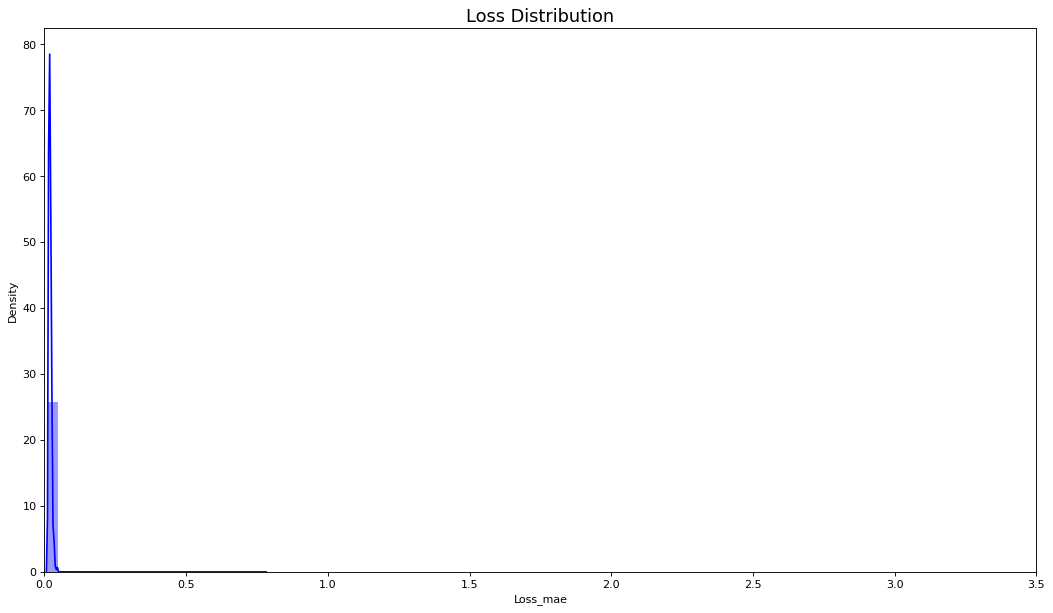

In [25]:
scored = pd.DataFrame(index=df.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_train), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,3.5])

In [26]:
X_pred = model.predict(X_test, verbose=1)

32768/32768 [==============================] - 101s 3ms/step


In [27]:
X_test=np.array(X_test)
X_test.shape=(1048576, features,1)
X_test.shape

(1048576, 5, 1)

C:\Users\glowi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 2.0)

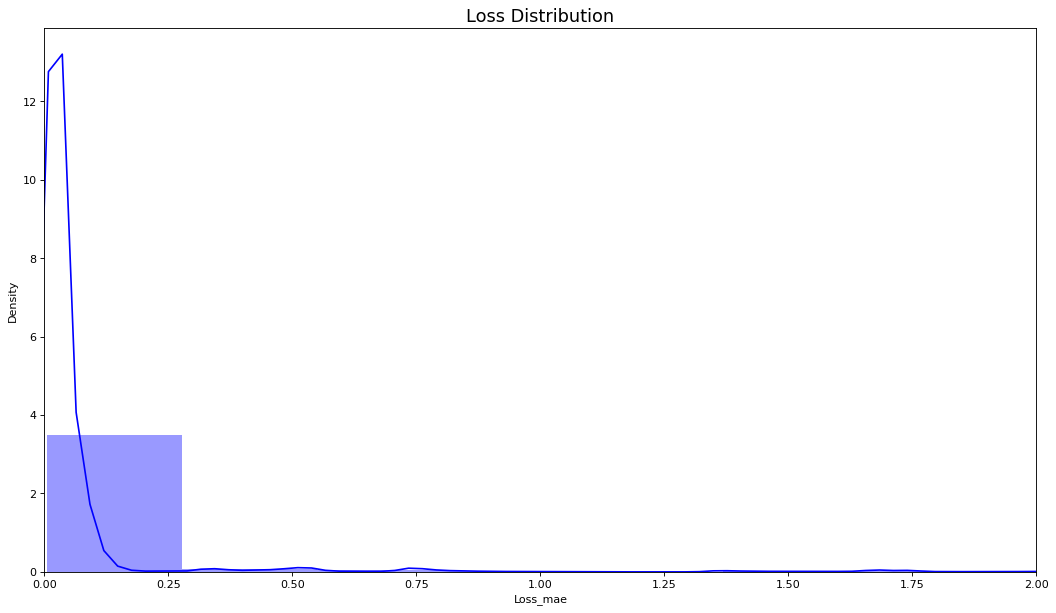

In [28]:
scored = pd.DataFrame(index=Cavdf.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,2])

C:\Users\glowi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 0.3)

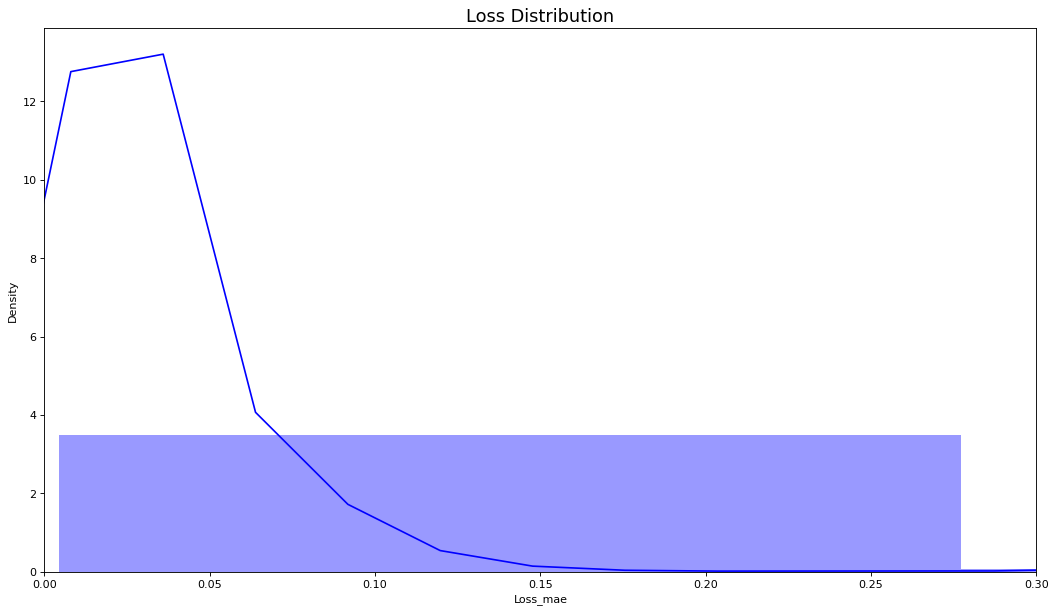

In [46]:
scored = pd.DataFrame(index=Cavdf.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,0.3])

In [47]:
# calculate the loss on the test set
test_mae_loss = np.mean(np.abs(X_pred-X_test), axis = 1)
threshold=0.2

In [48]:
test_mae_loss.shape

(1048576, 1)

In [49]:
test_score_df = Cavdf
test_score_df['loss'] = test_mae_loss
test_score_df['threshold'] = threshold
test_score_df['anomaly'] = test_score_df['loss'] > test_score_df['threshold']


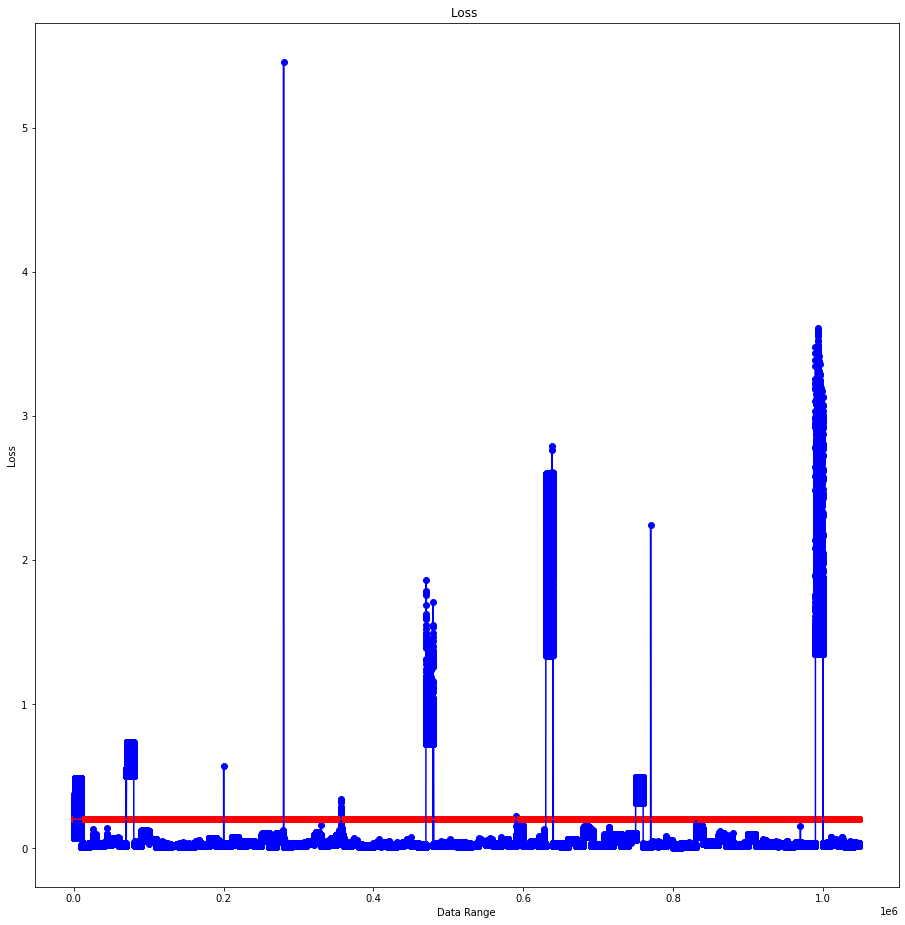

In [50]:
fig=plt.figure()
plt.rcParams["figure.figsize"] = (12,12)
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=test_score_df.index, y=test_score_df['loss'],color='b')
ax.scatter(x=test_score_df.index, y=test_score_df['threshold'], color='r')
ax.plot(test_score_df.index, test_score_df['loss'], color='b')
ax.plot(test_score_df.index, test_score_df['threshold'], color='r')
ax.set_xlabel('Data Range')
ax.set_ylabel('Loss')
ax.set_title('Loss ')
plt.show()

In [51]:
test_score_df

,P out bar,P in bar,Q L/M,Dynamic Pressure,H,Time,loss,threshold,anomaly
0,-0.637856,1.664881,1.177414,1.180099,-0.730041,0.000000,0.135249,0.2,False
1,1.465952,1.664881,1.177414,0.788860,1.380058,0.000098,0.147353,0.2,False
2,1.465952,1.664881,1.177414,0.626090,1.380058,0.000195,0.123167,0.2,False
3,1.465952,1.664881,1.177414,1.072405,1.380058,0.000293,0.160514,0.2,False
4,1.465952,1.664881,1.177414,0.198206,1.380058,0.000391,0.129298,0.2,False
...,...,...,...,...,...,...,...,...,...
1048571,-0.124429,0.189847,0.438994,0.812495,-0.135096,102.399512,0.017641,0.2,False
1048572,-0.124429,0.189847,0.438994,0.093187,-0.135096,102.399609,0.020758,0.2,False
1048573,-0.124429,0.189847,0.438994,0.360976,-0.135096,102.399707,0.016044,0.2,False
1048574,-0.124429,0.189847,0.438994,0.741663,-0.135096,102.399805,0.017553,0.2,False


In [52]:
test_score_df["anomaly"][1]

False

In [53]:
anomalies=test_score_df


In [54]:
anomalies=anomalies.drop(anomalies.index[anomalies["anomaly"] ==False])
anomalies

,P out bar,P in bar,Q L/M,Dynamic Pressure,H,Time,loss,threshold,anomaly
48,1.465952,1.664881,1.177414,-0.064306,1.380058,0.004687,0.200245,0.2,True
50,1.465952,1.664881,1.177414,-0.122056,1.380058,0.004883,0.214714,0.2,True
53,1.465952,1.664881,1.177414,-0.305858,1.380058,0.005176,0.252807,0.2,True
55,1.465952,1.664881,1.177414,-0.103698,1.380058,0.005371,0.209988,0.2,True
58,1.465952,1.664881,1.177414,-0.337372,1.380058,0.005664,0.258837,0.2,True
...,...,...,...,...,...,...,...,...,...
999995,-4.945634,-1.169536,0.439230,-0.095819,-4.897004,97.655762,1.752062,0.2,True
999996,-4.945634,-1.169536,0.439230,0.547380,-4.897004,97.655859,1.694027,0.2,True
999997,-4.945634,-1.169536,0.439230,-0.250711,-4.897004,97.655957,1.742388,0.2,True
999998,-4.945634,-1.169536,0.439230,0.261233,-4.897004,97.656055,1.667651,0.2,True


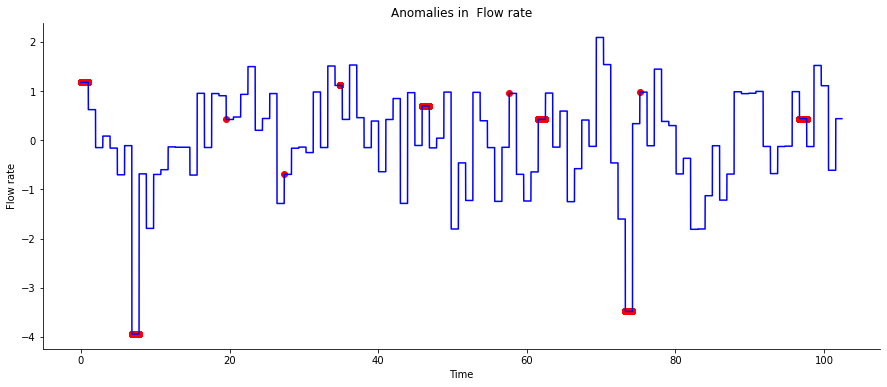

In [55]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df['Time '], test_score_df['Q  L/M'], color='blue')
ax.scatter(anomalies['Time '], anomalies['Q  L/M'], color='red')
sb.despine()
plt.title("Anomalies in  Flow rate")
plt.xlabel("Time")
plt.ylabel("Flow rate")

plt.show()

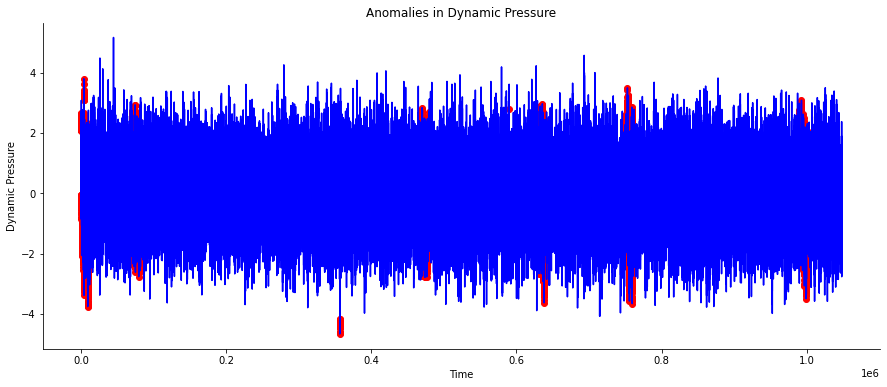

In [56]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df.index, test_score_df['Dynamic Pressure'], color='blue')
ax.scatter(anomalies.index, anomalies['Dynamic Pressure'], color='red')
sb.despine()
plt.title("Anomalies in Dynamic Pressure")
plt.xlabel("Time")
plt.ylabel("Dynamic Pressure")
plt.show()

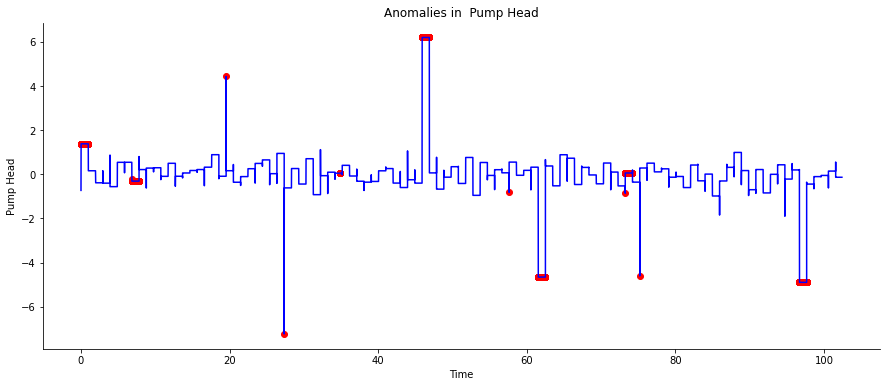

In [57]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df['Time '], test_score_df['H'], color='blue')
ax.scatter(anomalies['Time '], anomalies['H'], color='red')
sb.despine()
plt.title("Anomalies in  Pump Head")
plt.xlabel("Time")
plt.ylabel("Pump Head")

plt.show()

In [58]:
model.save("Bi_LSTM01_DP")


INFO:tensorflow:Assets written to: Bi_LSTM01_DP\assets


# Vibration


In [59]:
Normal_Vib=pd.read_csv("Normal_Vib.csv")

In [60]:
Normal_Vib=Normal_Vib.drop(columns=['Unnamed: 0'])
Normal_Vib

,Time,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,0.000000,1.161289,-0.084085,49.443383,0.897711,0.374315,1.245374
1,0.000098,1.161289,-0.084085,49.443383,-0.612374,1.983866,1.245374
2,0.000195,1.161289,-0.084085,49.443383,-0.699269,2.101856,1.245374
3,0.000293,1.161289,-0.084085,49.443383,1.121377,1.053456,1.245374
4,0.000391,1.161289,-0.084085,49.443383,-0.672813,-2.743689,1.245374
...,...,...,...,...,...,...,...
919995,89.843262,0.593152,-0.090887,49.371344,-1.833754,-1.940224,0.684039
919996,89.843359,0.593152,-0.090887,49.371344,1.000499,1.311315,0.684039
919997,89.843457,0.593152,-0.090887,49.371344,-0.302599,0.097853,0.684039
919998,89.843555,0.593152,-0.090887,49.371344,-1.227691,3.129577,0.684039


In [61]:
Normal_Vibx=Normal_Vib
Normal_Vib=Normal_Vibx.drop(columns=['Time '])
Normal_Vib

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,1.161289,-0.084085,49.443383,0.897711,0.374315,1.245374
1,1.161289,-0.084085,49.443383,-0.612374,1.983866,1.245374
2,1.161289,-0.084085,49.443383,-0.699269,2.101856,1.245374
3,1.161289,-0.084085,49.443383,1.121377,1.053456,1.245374
4,1.161289,-0.084085,49.443383,-0.672813,-2.743689,1.245374
...,...,...,...,...,...,...
919995,0.593152,-0.090887,49.371344,-1.833754,-1.940224,0.684039
919996,0.593152,-0.090887,49.371344,1.000499,1.311315,0.684039
919997,0.593152,-0.090887,49.371344,-0.302599,0.097853,0.684039
919998,0.593152,-0.090887,49.371344,-1.227691,3.129577,0.684039


In [62]:
#Normalizing the data
for col in Normal_Vib:
    Normal_Vib[col] = (Normal_Vib[col]-Normal_Vib[col].min())/(Normal_Vib[col].max()-Normal_Vib[col].min())

In [63]:
Cavitation_Vib=pd.read_csv("Cavitation_Vib.csv")
Cavitation_Vib=Cavitation_Vib.drop(columns=['Unnamed: 0'])
Cavitation_Vib

,Time,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,0.000000,0.165204,-0.616328,27.839285,0.283178,-0.124765,0.781532
1,0.000098,0.371800,-0.616328,27.839285,-0.120759,-0.894264,0.988128
2,0.000195,0.371800,-0.616328,27.839285,0.331279,0.257127,0.988128
3,0.000293,0.371800,-0.616328,27.839285,0.509145,-0.061347,0.988128
4,0.000391,0.371800,-0.616328,27.839285,0.419741,-1.516285,0.988128
...,...,...,...,...,...,...,...
1048571,102.399512,0.215623,-0.624159,27.789128,-0.415425,-0.193316,0.839782
1048572,102.399609,0.215623,-0.624159,27.789128,-0.075482,0.310897,0.839782
1048573,102.399707,0.215623,-0.624159,27.789128,0.161987,0.578513,0.839782
1048574,102.399805,0.215623,-0.624159,27.789128,-0.611381,0.048815,0.839782


In [64]:
Cavitation_Vibx=Cavitation_Vib
Cavitation_Vib=Cavitation_Vib.drop(columns=['Time '])
Cavitation_Vib

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,0.165204,-0.616328,27.839285,0.283178,-0.124765,0.781532
1,0.371800,-0.616328,27.839285,-0.120759,-0.894264,0.988128
2,0.371800,-0.616328,27.839285,0.331279,0.257127,0.988128
3,0.371800,-0.616328,27.839285,0.509145,-0.061347,0.988128
4,0.371800,-0.616328,27.839285,0.419741,-1.516285,0.988128
...,...,...,...,...,...,...
1048571,0.215623,-0.624159,27.789128,-0.415425,-0.193316,0.839782
1048572,0.215623,-0.624159,27.789128,-0.075482,0.310897,0.839782
1048573,0.215623,-0.624159,27.789128,0.161987,0.578513,0.839782
1048574,0.215623,-0.624159,27.789128,-0.611381,0.048815,0.839782


In [65]:
#Normalizing the data
for col in Cavitation_Vib:
    Cavitation_Vib[col] = (Cavitation_Vib[col]-Cavitation_Vib[col].min())/(Cavitation_Vib[col].max()-Cavitation_Vib[col].min())

In [66]:
scaler = StandardScaler()

scaler.fit(Normal_Vib)
Normal_Vib = scaler.transform(Normal_Vib)

scaler.fit(Cavitation_Vib)
Cavitation_Vib = scaler.transform(Cavitation_Vib)


In [67]:
df=Normal_Vib
Cavdf=Cavitation_Vib


In [68]:
df = pd.DataFrame(df, columns =[ 'P out bar', 'P in bar', 'Q  L/M', 'Vibration 1','Vibration 2','H'])
Cavdf = pd.DataFrame(Cavdf, columns =['P out bar', 'P in bar', 'Q  L/M', 'Vibration 1','Vibration 2','H'])


In [69]:
df['Time ']=Normal_Vibx['Time ']
df

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H,Time
0,5.931638,0.809176,-1.136223,0.683436,0.204239,5.906167,0.000000
1,5.931638,0.809176,-1.136223,-0.465067,1.096988,5.906167,0.000098
2,5.931638,0.809176,-1.136223,-0.531155,1.162432,5.906167,0.000195
3,5.931638,0.809176,-1.136223,0.853546,0.580930,5.906167,0.000293
4,5.931638,0.809176,-1.136223,-0.511034,-1.525184,5.906167,0.000391
...,...,...,...,...,...,...,...
919995,0.439571,-0.955959,-1.698760,-1.393993,-1.079537,0.475558,89.843262
919996,0.439571,-0.955959,-1.698760,0.761612,0.723953,0.475558,89.843359
919997,0.439571,-0.955959,-1.698760,-0.229466,0.050897,0.475558,89.843457
919998,0.439571,-0.955959,-1.698760,-0.933049,1.732465,0.475558,89.843555


In [70]:
Cavdf['Time ']=Cavitation_Vibx['Time ']
Cavdf

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H,Time
0,-0.637856,1.664881,1.177414,0.415064,-0.111326,-0.730041,0.000000
1,1.465952,1.664881,1.177414,-0.192664,-0.761338,1.380058,0.000098
2,1.465952,1.664881,1.177414,0.487433,0.211266,1.380058,0.000195
3,1.465952,1.664881,1.177414,0.755034,-0.057756,1.380058,0.000293
4,1.465952,1.664881,1.177414,0.620525,-1.286773,1.380058,0.000391
...,...,...,...,...,...,...,...
1048571,-0.124429,0.189847,0.438994,-0.635992,-0.169233,-0.135096,102.399512
1048572,-0.124429,0.189847,0.438994,-0.124544,0.256686,-0.135096,102.399609
1048573,-0.124429,0.189847,0.438994,0.232731,0.482747,-0.135096,102.399707
1048574,-0.124429,0.189847,0.438994,-0.930811,0.035300,-0.135096,102.399805


In [71]:
X_train=df

In [72]:
X_train=X_train.drop(columns=['Time '])
X_train

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,5.931638,0.809176,-1.136223,0.683436,0.204239,5.906167
1,5.931638,0.809176,-1.136223,-0.465067,1.096988,5.906167
2,5.931638,0.809176,-1.136223,-0.531155,1.162432,5.906167
3,5.931638,0.809176,-1.136223,0.853546,0.580930,5.906167
4,5.931638,0.809176,-1.136223,-0.511034,-1.525184,5.906167
...,...,...,...,...,...,...
919995,0.439571,-0.955959,-1.698760,-1.393993,-1.079537,0.475558
919996,0.439571,-0.955959,-1.698760,0.761612,0.723953,0.475558
919997,0.439571,-0.955959,-1.698760,-0.229466,0.050897,0.475558
919998,0.439571,-0.955959,-1.698760,-0.933049,1.732465,0.475558


In [73]:
X_train=np.array(X_train)


In [74]:
timesteps=X_train.shape[0]
features=X_train.shape[1]


In [75]:
X_train.shape=(timesteps,features,1)
X_train.shape

(920000, 6, 1)

In [76]:
#Starting the LSTM model
model = keras.Sequential()

model.add(layers.Bidirectional(LSTM(36, activation='relu', return_sequences=True)))
model.add(layers.BatchNormalization())

model.add(layers.Bidirectional(LSTM(6, activation='relu', return_sequences=False)))
model.add(layers.BatchNormalization())

model.add(layers.RepeatVector(features))

model.add(layers.Bidirectional(LSTM(6, activation='relu', return_sequences=True)))
model.add(layers.BatchNormalization())

model.add((layers.Bidirectional(LSTM(36, activation='relu', return_sequences=True))))
model.add(layers.BatchNormalization())
         
model.add(layers.TimeDistributed(Dense(X_train.shape[2])))

model.compile(optimizer='adam', loss='mae')



In [77]:
X_test=Cavdf

In [78]:
X_test=X_test.drop(columns=['Time '])
X_test

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,-0.637856,1.664881,1.177414,0.415064,-0.111326,-0.730041
1,1.465952,1.664881,1.177414,-0.192664,-0.761338,1.380058
2,1.465952,1.664881,1.177414,0.487433,0.211266,1.380058
3,1.465952,1.664881,1.177414,0.755034,-0.057756,1.380058
4,1.465952,1.664881,1.177414,0.620525,-1.286773,1.380058
...,...,...,...,...,...,...
1048571,-0.124429,0.189847,0.438994,-0.635992,-0.169233,-0.135096
1048572,-0.124429,0.189847,0.438994,-0.124544,0.256686,-0.135096
1048573,-0.124429,0.189847,0.438994,0.232731,0.482747,-0.135096
1048574,-0.124429,0.189847,0.438994,-0.930811,0.035300,-0.135096


In [79]:
X_test.shape

(1048576, 6)

In [80]:
model.fit(X_train, X_train, epochs=150, batch_size=512, validation_data=(X_test, X_test))


Epoch 1/150
1797/1797 [==============================] - 68s 33ms/step - loss: 0.2734 - val_loss: 0.1858
Epoch 2/150
1797/1797 [==============================] - 57s 32ms/step - loss: 0.0645 - val_loss: 0.0712
Epoch 3/150
1797/1797 [==============================] - 56s 31ms/step - loss: 0.0556 - val_loss: 0.0843
Epoch 4/150
1797/1797 [==============================] - 57s 32ms/step - loss: 0.0512 - val_loss: 0.0630
Epoch 5/150
1797/1797 [==============================] - 57s 32ms/step - loss: 0.0494 - val_loss: 0.0679
Epoch 6/150
1797/1797 [==============================] - 59s 33ms/step - loss: 0.0471 - val_loss: 0.0546
Epoch 7/150
1797/1797 [==============================] - 57s 32ms/step - loss: 0.0462 - val_loss: 0.0507
Epoch 8/150
1797/1797 [==============================] - 58s 32ms/step - loss: 0.0454 - val_loss: 0.0726
Epoch 9/150
1797/1797 [==============================] - 57s 32ms/step - loss: 0.0434 - val_loss: 0.0669
Epoch 10/150
1797/1797 [==============================]

1797/1797 [==============================] - 72s 40ms/step - loss: 0.0249 - val_loss: 0.0751
Epoch 79/150
1797/1797 [==============================] - 69s 39ms/step - loss: 0.0246 - val_loss: 0.0782
Epoch 80/150
1797/1797 [==============================] - 72s 40ms/step - loss: 0.0245 - val_loss: 0.0789
Epoch 81/150
1797/1797 [==============================] - 71s 40ms/step - loss: 0.0247 - val_loss: 0.0779
Epoch 82/150
1797/1797 [==============================] - 71s 39ms/step - loss: 0.0245 - val_loss: 0.0781
Epoch 83/150
1797/1797 [==============================] - 72s 40ms/step - loss: 0.0246 - val_loss: 0.0783
Epoch 84/150
1797/1797 [==============================] - 71s 40ms/step - loss: 0.0245 - val_loss: 0.0812
Epoch 85/150
1797/1797 [==============================] - 72s 40ms/step - loss: 0.0247 - val_loss: 0.0789
Epoch 86/150
1797/1797 [==============================] - 73s 41ms/step - loss: 0.0243 - val_loss: 0.0816
Epoch 87/150
1797/1797 [==============================] - 7

In [81]:
X_pred = model.predict(X_train, verbose=1)

28750/28750 [==============================] - 98s 3ms/step


C:\Users\glowi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 3.5)

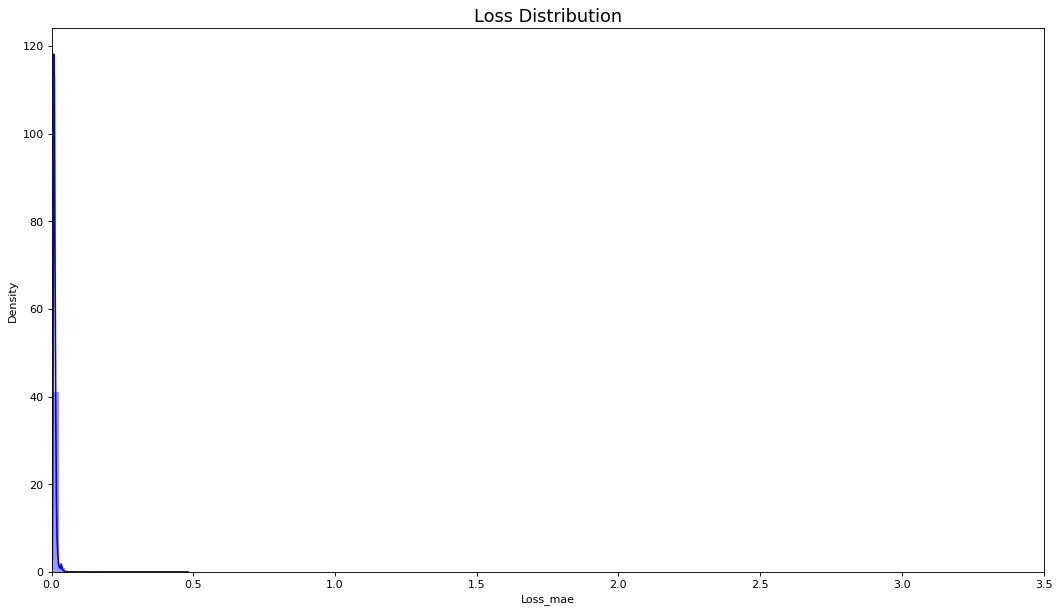

In [82]:
scored = pd.DataFrame(index=df.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_train), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,3.5])

In [83]:
X_pred = model.predict(X_test, verbose=1)

32768/32768 [==============================] - 119s 4ms/step


In [84]:
X_test=np.array(X_test)
X_test.shape=(1048576, features,1)
X_test.shape

(1048576, 6, 1)

C:\Users\glowi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 2.0)

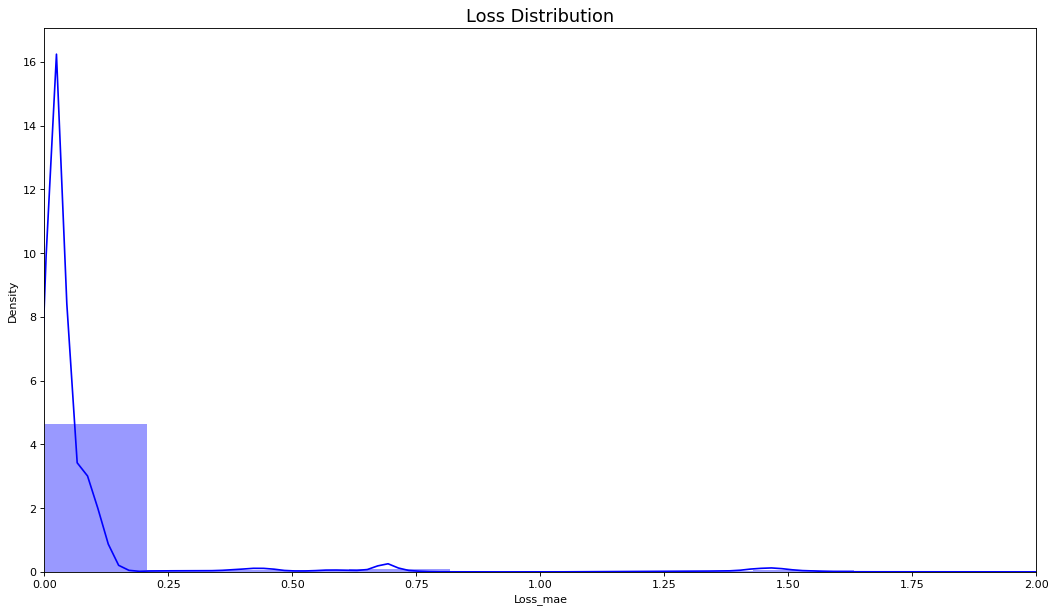

In [85]:
scored = pd.DataFrame(index=Cavdf.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,2])

C:\Users\glowi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 0.3)

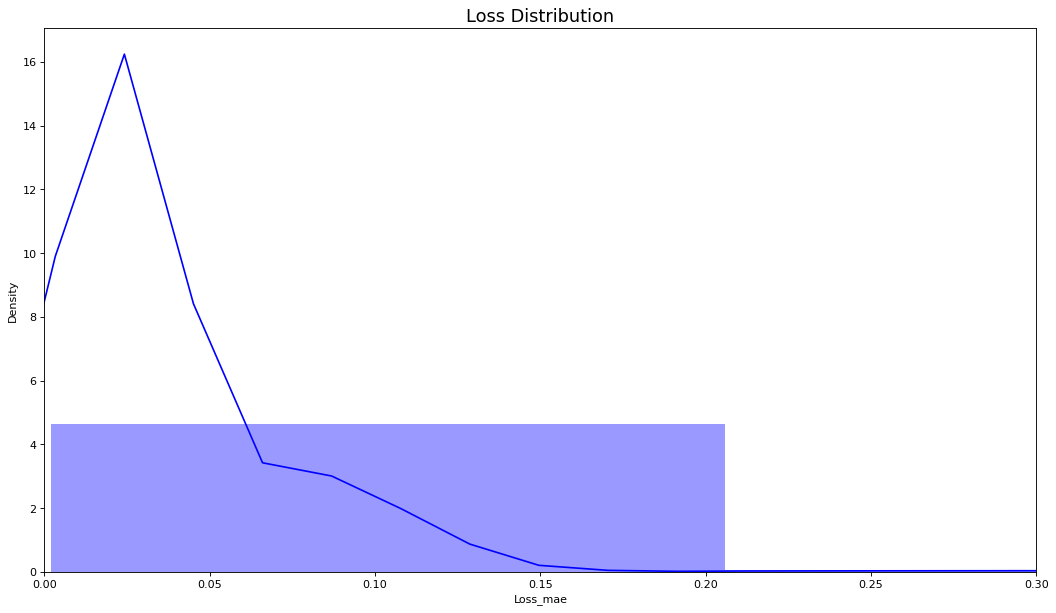

In [86]:
scored = pd.DataFrame(index=Cavdf.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,0.3])

In [87]:
# calculate the loss on the test set
test_mae_loss = np.mean(np.abs(X_pred-X_test), axis = 1)
threshold=0.2

In [88]:
test_mae_loss.shape

(1048576, 1)

In [89]:
test_score_df = Cavdf
test_score_df['loss'] = test_mae_loss
test_score_df['threshold'] = threshold
test_score_df['anomaly'] = test_score_df['loss'] > test_score_df['threshold']


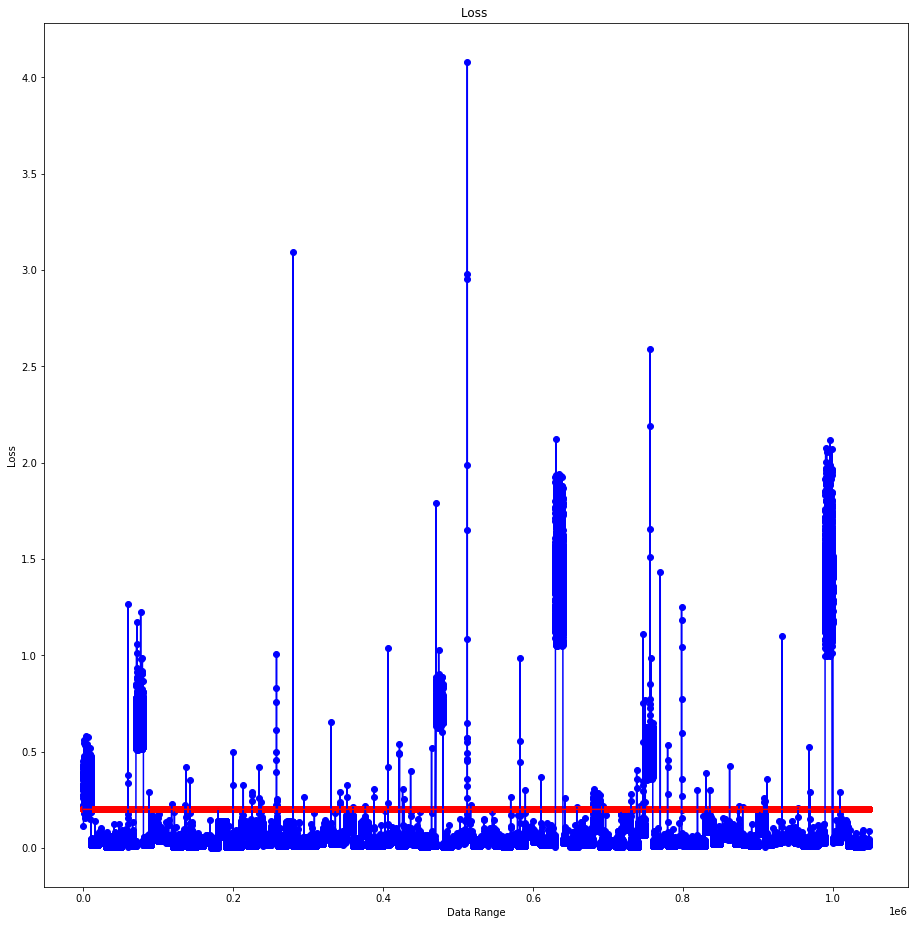

In [90]:
fig=plt.figure()
plt.rcParams["figure.figsize"] = (12,12)
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=test_score_df.index, y=test_score_df['loss'],color='b')
ax.scatter(x=test_score_df.index, y=test_score_df['threshold'], color='r')
ax.plot(test_score_df.index, test_score_df['loss'], color='b')
ax.plot(test_score_df.index, test_score_df['threshold'], color='r')
ax.set_xlabel('Data Range')
ax.set_ylabel('Loss')
ax.set_title('Loss ')
plt.show()

In [91]:
test_score_df

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H,Time,loss,threshold,anomaly
0,-0.637856,1.664881,1.177414,0.415064,-0.111326,-0.730041,0.000000,0.113424,0.2,False
1,1.465952,1.664881,1.177414,-0.192664,-0.761338,1.380058,0.000098,0.318016,0.2,True
2,1.465952,1.664881,1.177414,0.487433,0.211266,1.380058,0.000195,0.419796,0.2,True
3,1.465952,1.664881,1.177414,0.755034,-0.057756,1.380058,0.000293,0.425934,0.2,True
4,1.465952,1.664881,1.177414,0.620525,-1.286773,1.380058,0.000391,0.323501,0.2,True
...,...,...,...,...,...,...,...,...,...,...
1048571,-0.124429,0.189847,0.438994,-0.635992,-0.169233,-0.135096,102.399512,0.018079,0.2,False
1048572,-0.124429,0.189847,0.438994,-0.124544,0.256686,-0.135096,102.399609,0.015626,0.2,False
1048573,-0.124429,0.189847,0.438994,0.232731,0.482747,-0.135096,102.399707,0.015797,0.2,False
1048574,-0.124429,0.189847,0.438994,-0.930811,0.035300,-0.135096,102.399805,0.020091,0.2,False


In [92]:
test_score_df["anomaly"][1]

True

In [93]:
anomalies=test_score_df


In [94]:
anomalies=anomalies.drop(anomalies.index[anomalies["anomaly"] ==False])
anomalies

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H,Time,loss,threshold,anomaly
1,1.465952,1.664881,1.177414,-0.192664,-0.761338,1.380058,0.000098,0.318016,0.2,True
2,1.465952,1.664881,1.177414,0.487433,0.211266,1.380058,0.000195,0.419796,0.2,True
3,1.465952,1.664881,1.177414,0.755034,-0.057756,1.380058,0.000293,0.425934,0.2,True
4,1.465952,1.664881,1.177414,0.620525,-1.286773,1.380058,0.000391,0.323501,0.2,True
5,1.465952,1.664881,1.177414,1.448109,-0.057910,1.380058,0.000488,0.411019,0.2,True
...,...,...,...,...,...,...,...,...,...,...
999996,-4.945634,-1.169536,0.439230,-1.532954,0.276891,-4.897004,97.655859,1.231913,0.2,True
999997,-4.945634,-1.169536,0.439230,-1.389872,-1.524488,-4.897004,97.655957,1.181484,0.2,True
999998,-4.945634,-1.169536,0.439230,-0.336533,-1.072029,-4.897004,97.656055,1.438187,0.2,True
999999,-4.945634,-1.169536,0.439230,0.787756,1.140139,-4.897004,97.656152,1.466796,0.2,True


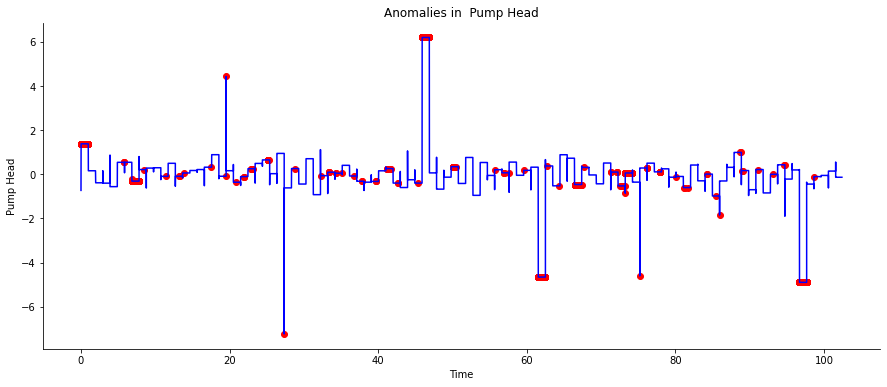

In [95]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df['Time '], test_score_df['H'], color='blue')
ax.scatter(anomalies['Time '], anomalies['H'], color='red')
sb.despine()
plt.title("Anomalies in  Pump Head")
plt.xlabel("Time")
plt.ylabel("Pump Head")

plt.show()

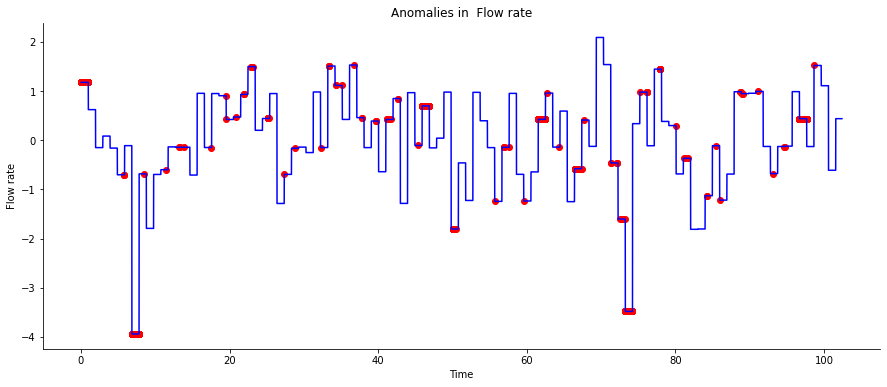

In [96]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df['Time '], test_score_df['Q  L/M'], color='blue')
ax.scatter(anomalies['Time '], anomalies['Q  L/M'], color='red')
sb.despine()
plt.title("Anomalies in  Flow rate")
plt.xlabel("Time")
plt.ylabel("Flow rate")

plt.show()

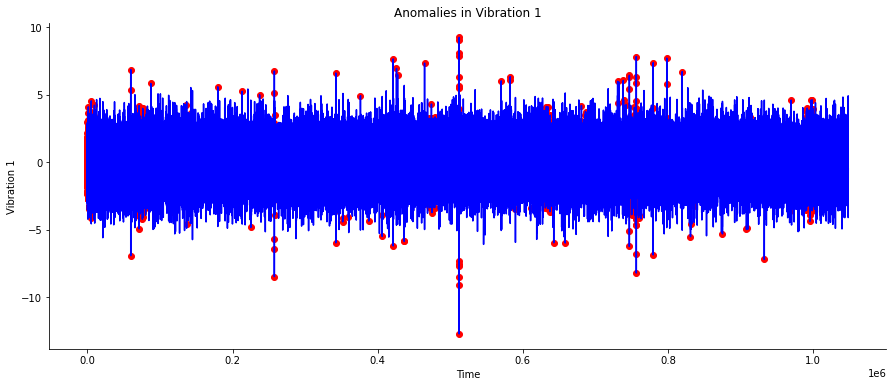

In [97]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df.index, test_score_df['Vibration 1'], color='blue')
ax.scatter(anomalies.index, anomalies['Vibration 1'], color='red')
sb.despine()
plt.title("Anomalies in Vibration 1")
plt.xlabel("Time")
plt.ylabel("Vibration 1")
plt.show()

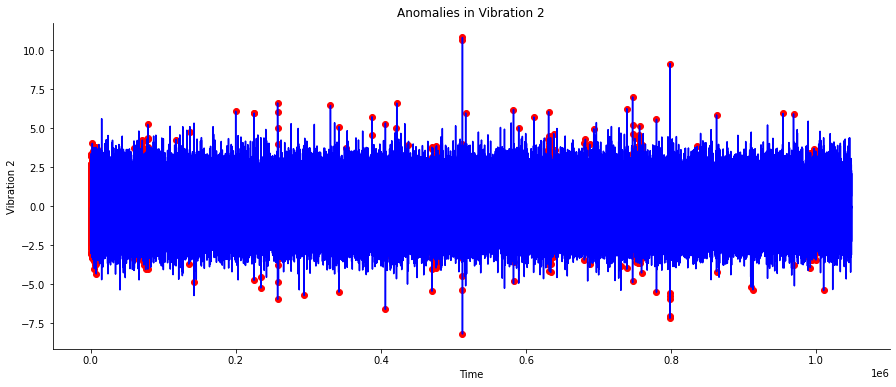

In [98]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df.index, test_score_df['Vibration 2'], color='blue')
ax.scatter(anomalies.index, anomalies['Vibration 2'], color='red')
sb.despine()
plt.title("Anomalies in Vibration 2")
plt.xlabel("Time")
plt.ylabel("Vibration 2")
plt.show()

In [99]:
model.save("Bi_LSTM01_Vib")


INFO:tensorflow:Assets written to: Bi_LSTM01_Vib\assets


INFO:tensorflow:Assets written to: Bi_LSTM01_Vib\assets
